# SWMAL Exercise


## Convolutional Neural Networks (CNNs)


Excercise 9 from [HOML], p.496 2nd./p.535 3rd. (slighty modified):

__"9. Build an CNN via the Keras API and try to achieve the highest possible accuracy on MNIST."__

For the journal: 

* write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..), 
* document your experiments towards the end-goal of reaching 'a high accuracy' (what did you try, what work/did not work), 
* document how you use '_generalization_' in your setup (us of simple hold-out/train-test split or k-fold, or etc..),
* produce some sort of '_learning-curve_' that illustrates the drop in cost- or increase in score-function with respect to, say training iteration (for inspiration see fig 4.20, 10-12 or 10.17 in [HOML]),
* document the final CNN setup (layers etc., perhaps as a graph/drawing), 
* discus on your iterations towards the end-goal and other findings you had,
* and, as always, write a conclusion.

If you use a code template from slides, HOML or the internet, then remember to add a reference to the original work in you journal.

# Introduction to CNN

### What are CNN's
Convolutional neural network's (CNN's) were invented in the 80's by Kunihiko Fukushima. 
His findings are inspired by Hubel and Wiesel's work on cats visual corties neurons that had small invdividual visual fields.
This inspiration was the begining for feature extraction, pooling layers, recognition and classification.
Kunihiko Fukushima's full article on Neocognitron can be read here: https://www.rctn.org/bruno/public/papers/Fukushima1980.pdf

Today CNN's are most commenly known for its use in image analysis. 
However, it is also commonly used for analysing stock prices and audio data.

Looking at image analysis, the CNN works by taking in a series of layers.
Each of these layers looks at different features in the image. 
These features come in different sizes. One filter could be looking at vertical lines, while another could be finding eye features. 
However, the whole thing starts by a convulotion operation. 
This operation is like a sliding filter of a giving size. The size is normally a 3x3 square, however as mentioned it is user decided.
The filter is called a kernel. Inside the kernel it reads the individual pixels within its square. 
And depending on the RPG color value it returns a number input (from 0-255) in the kernel square.
Each complete kernel run over the input layer and creates a feature map. 
If an example were to be made on the MINST numbers, one of these created feature maps could be identifying black values in the input layer. 
From the convolution, each layer is pooled to a smaller layer size.
Pooling layers downsample the convolution created feature maps.  
And on and on...
However, for each convolution and pooling one has to be aware of overfitting the CNN model.

In the CNN code below, generated by Google Gemini, we have inserted a visual learning curve, that visulizes how the loss is throughout the epochs.
Our CNN's input layer is a 28 by 28 by 1. Through our convolution we then take and expand the last layer, creating 32 channels. Each of these channels is then pooled through a 2 by 2 filter reducing the convolution layer from 26 by 26 by 32 to 13 by 13 by 32.
Our second convolution layer then takes on our pooled 32 layers and expands it to 64 layers with a smaller size.
Before the data is flatten our second convolution layer is then pooled to its last size.
When the data is flatteren we see, from the model.summary(), that the value is 1600. This value represents the total amount pixels our last pool contained (5*5*64 = 1600).

The flattern data is then held on to the first dense layer of 128 feature regonizors, meaning that this dense layer has 128 neurons/categories.
Afterwards this layer is then broken down to our input size (mean we have 10 different input images).

As a conclusion to the assignment the group tried out multiple amount of convolution layers and decided on including the one returning the best score for us.
High score is commented in the bottom of the code. We found that for each convolution layer we added the worse the CNN performed leaving us with two since one was to little.
We found that increasing the amount of feature maps in the first "Conv2D" would lead to increased step time when running the evalidation of the model. 
This makes sense due to the increased amount of features the model would look for. 

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9173 - loss: 0.2741 - val_accuracy: 0.9872 - val_loss: 0.0385
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9874 - loss: 0.0405 - val_accuracy: 0.9884 - val_loss: 0.0364
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9915 - val_loss: 0.0294
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9934 - loss: 0.0206 - val_accuracy: 0.9921 - val_loss: 0.0236
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9962 - loss: 0.0123 - val_accuracy: 0.9924 - val_loss: 0.0256
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9898 - val_loss: 0.0323
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9970 - loss: 0.0088 - val_accuracy: 0.9922 - val_loss: 0.0320
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9973 - loss: 0.0

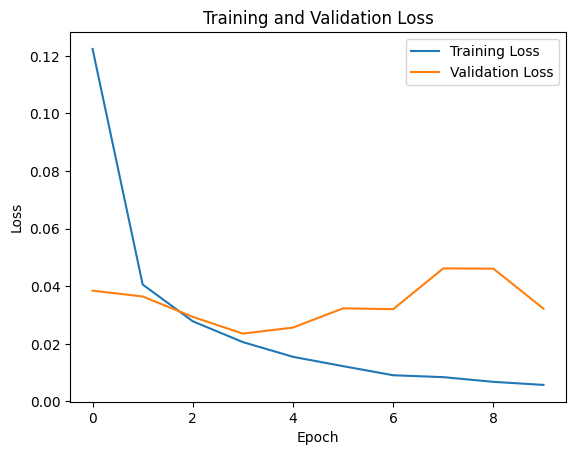

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0416
Test accuracy: 0.9927999973297119


In [26]:
# TODO: CNN implemetation via Keras..
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the model (replace with your final CNN architecture)
model = keras.Sequential([
  # First convolutional layer
  layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
  layers.MaxPooling2D(pool_size=(2, 2)),
  
  # Second convolutional layer
  layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(10, activation="softmax")
])

print(model.summary())

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Store training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the learning curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

# Highest score run 99.33


REVISIONS||
:- | :- |
2021-10-20| CEF, initial version, clone from [HOML].
2021-10-26| CEF, added learning curve item.
2022-01-25| CEF, update to SWMAL F22.
2023-03-08| CEF, updated page no to HOML 3rd. ed., updated to SWMAL F23.
2023-03-15| CEF, removed wording "from scratch", replaced with "via the Keras API" and added comment about references.